In [1]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

az.style.use("arviz-doc")

In [30]:
df = pd.read_csv("./data/data500_4.csv")

In [31]:
# Compute mean and standard deviation for each combination of n_samples and q
grouped = df.groupby(["samples", "sampling method"])["estimator"].agg(["mean", "std"])

print(grouped)

                                        mean       std
samples sampling method                               
10      HMC/NUTS                    0.818374  0.616921
        importance sampling norm    0.944815  0.462364
        rejection sampling norm     0.895710  0.341577
        rejection sampling uniform  0.925233  0.411897
100     HMC/NUTS                    0.943960  0.310841
        importance sampling norm    0.908583  0.126450
        rejection sampling norm     0.918061  0.120216
        rejection sampling uniform  0.942172  0.127246
1000    HMC/NUTS                    0.907558  0.115886
        importance sampling norm    0.915117  0.041919
        rejection sampling norm     0.913995  0.042152
        rejection sampling uniform  0.911965  0.042062


/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_9807/3530691527.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


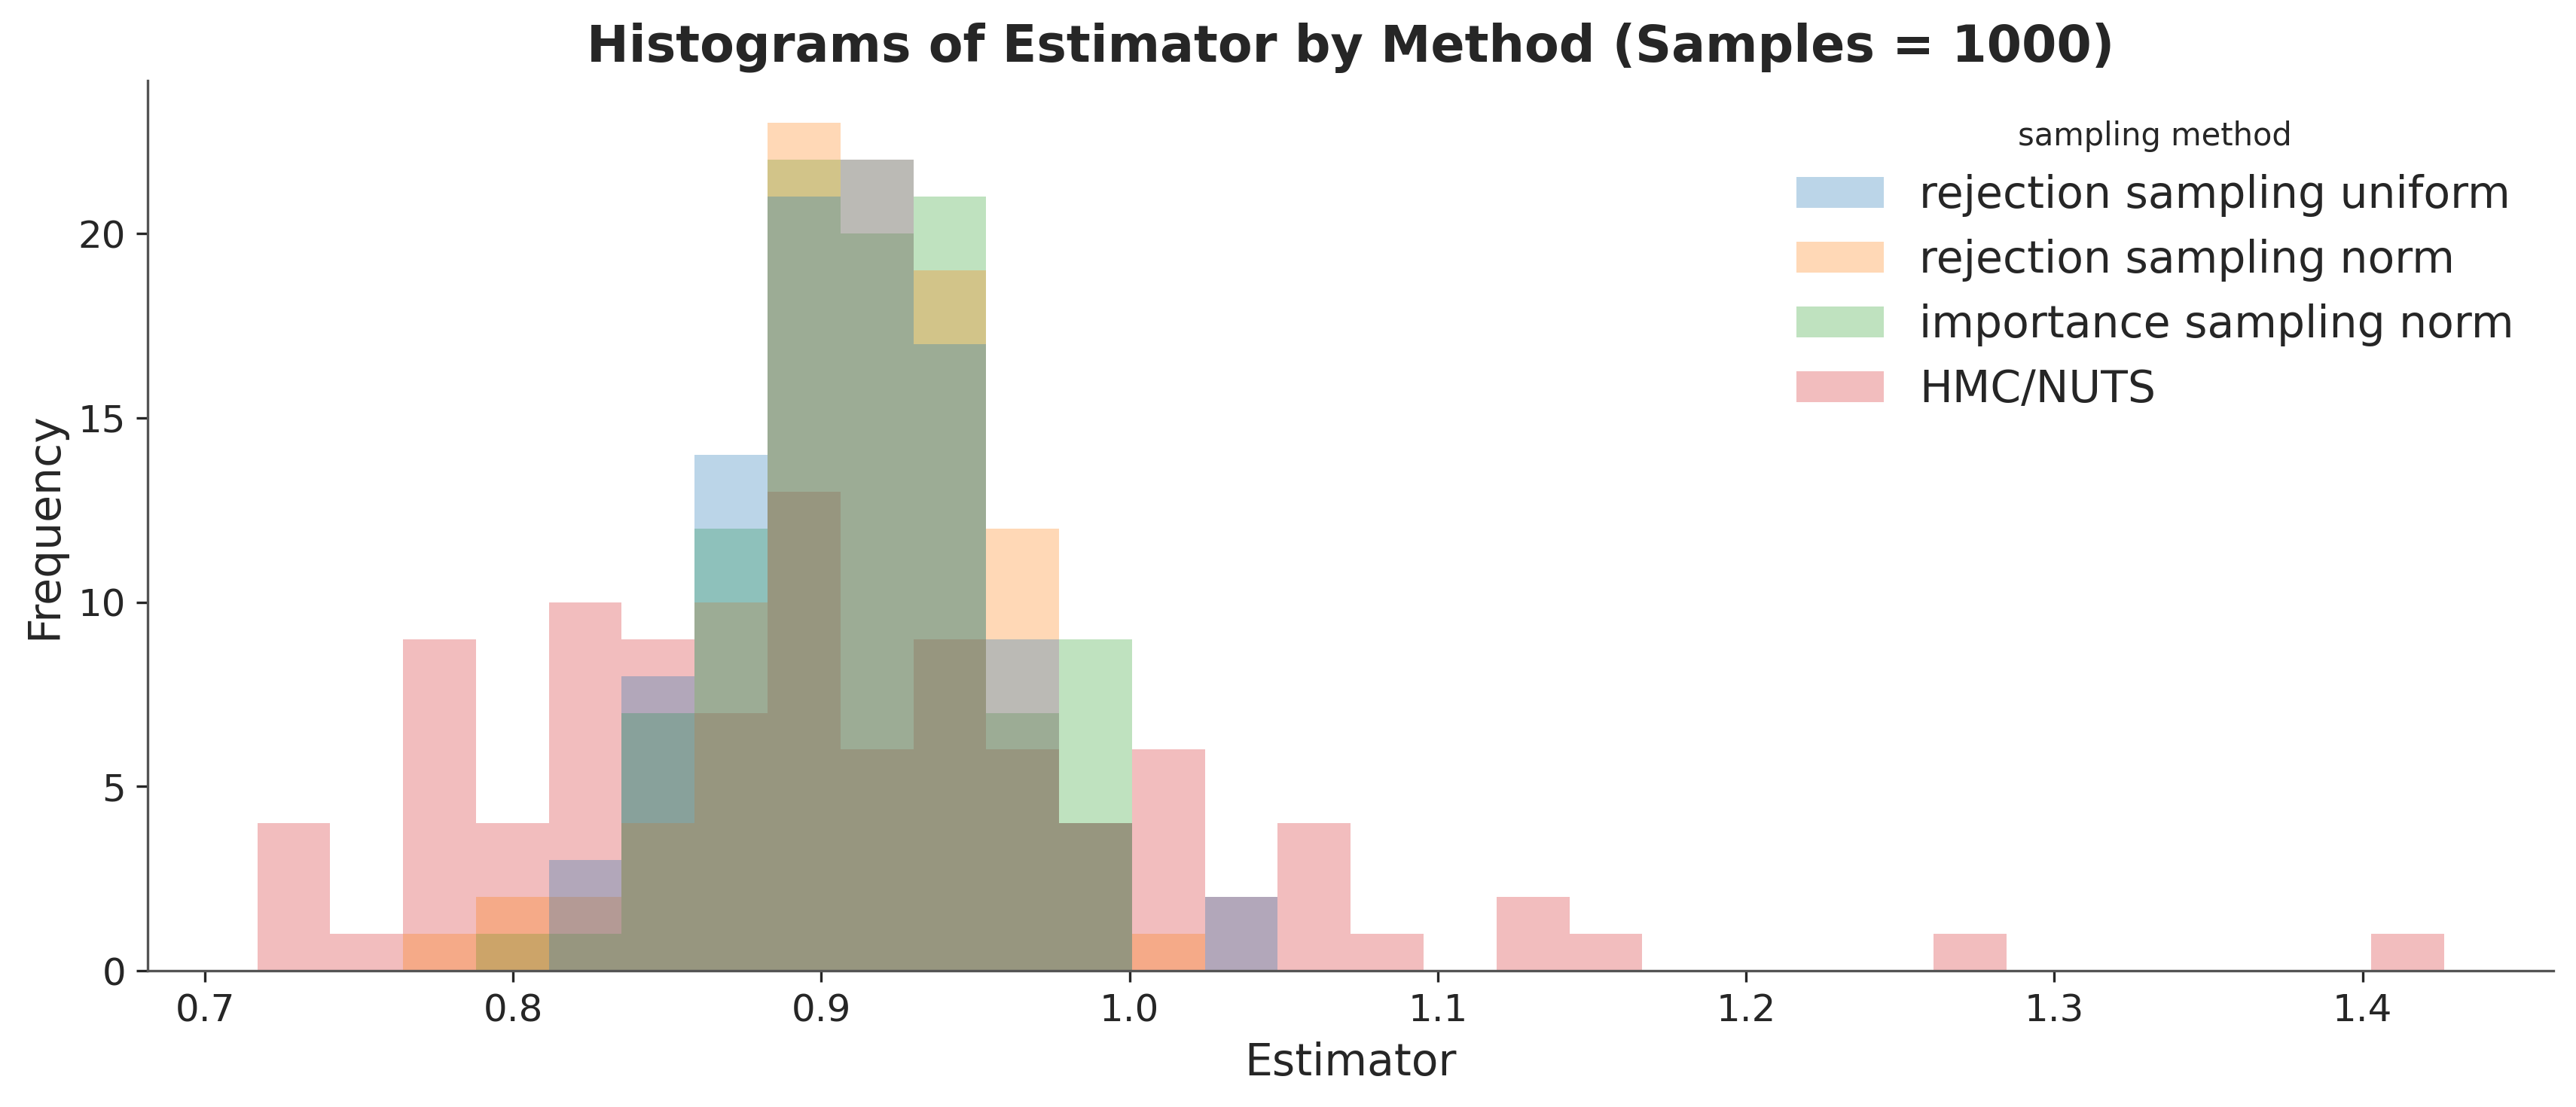

In [32]:
df_filtered = df[df["samples"] == 1000]

# Step 2: Create the histogram
sns.histplot(
    data=df_filtered,
    x="estimator",
    hue="sampling method",
    multiple="layer",  # Overlays the histograms
    palette="tab10",
    edgecolor=None,
    alpha=0.3,  # Adjust transparency for better visibility
    bins=30,  # Adjust the number of bins as needed
)
plt.title("Histograms of Estimator by Method (Samples = 1000)", fontsize=16)
plt.xlabel("Estimator", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_9807/4133552667.py:11: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Histograms of $\hat{r}$ with 4 chains of each 250 samples", fontsize=16)
/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_9807/4133552667.py:12: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel("$\hat{r}$", fontsize=14)
/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_9807/4133552667.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


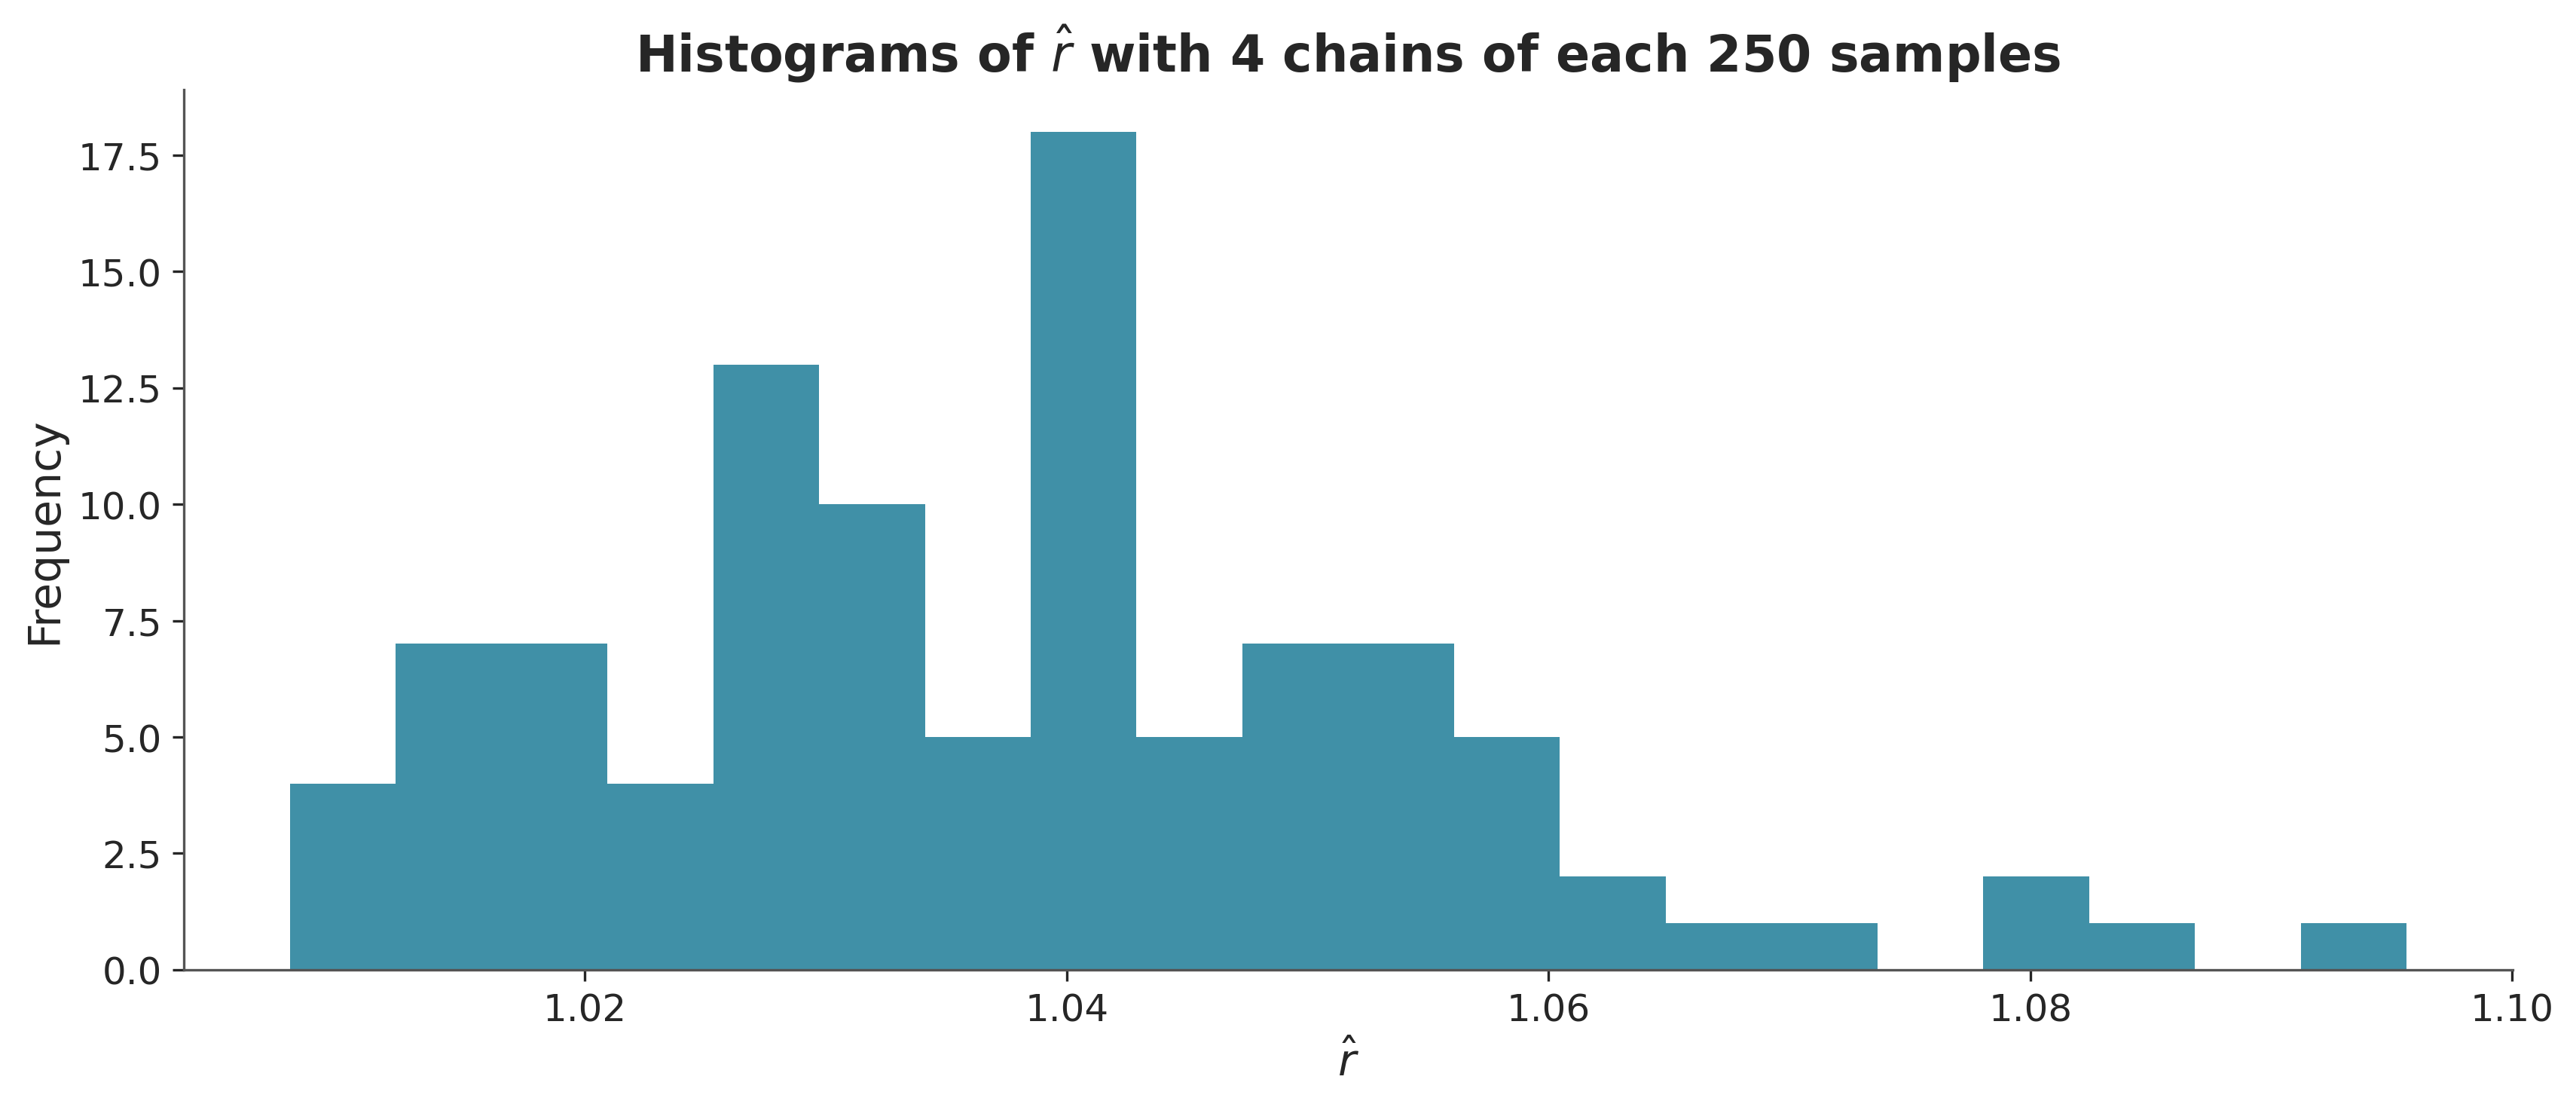

In [36]:
df_filtered = df[df["samples"] == 1000]

# Step 2: Create the histogram
sns.histplot(
    data=df_filtered,
    x="rhat",
    edgecolor=None,
    alpha=0.8,  # Adjust transparency for better visibility
    bins=20,  # Adjust the number of bins as needed
)
plt.title("Histograms of $\hat{r}$ with 4 chains of each 250 samples", fontsize=16)
plt.xlabel("$\hat{r}$", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("./figures/rhat_4chains_250samples.png")
plt.show()

/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_9807/4096135660.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


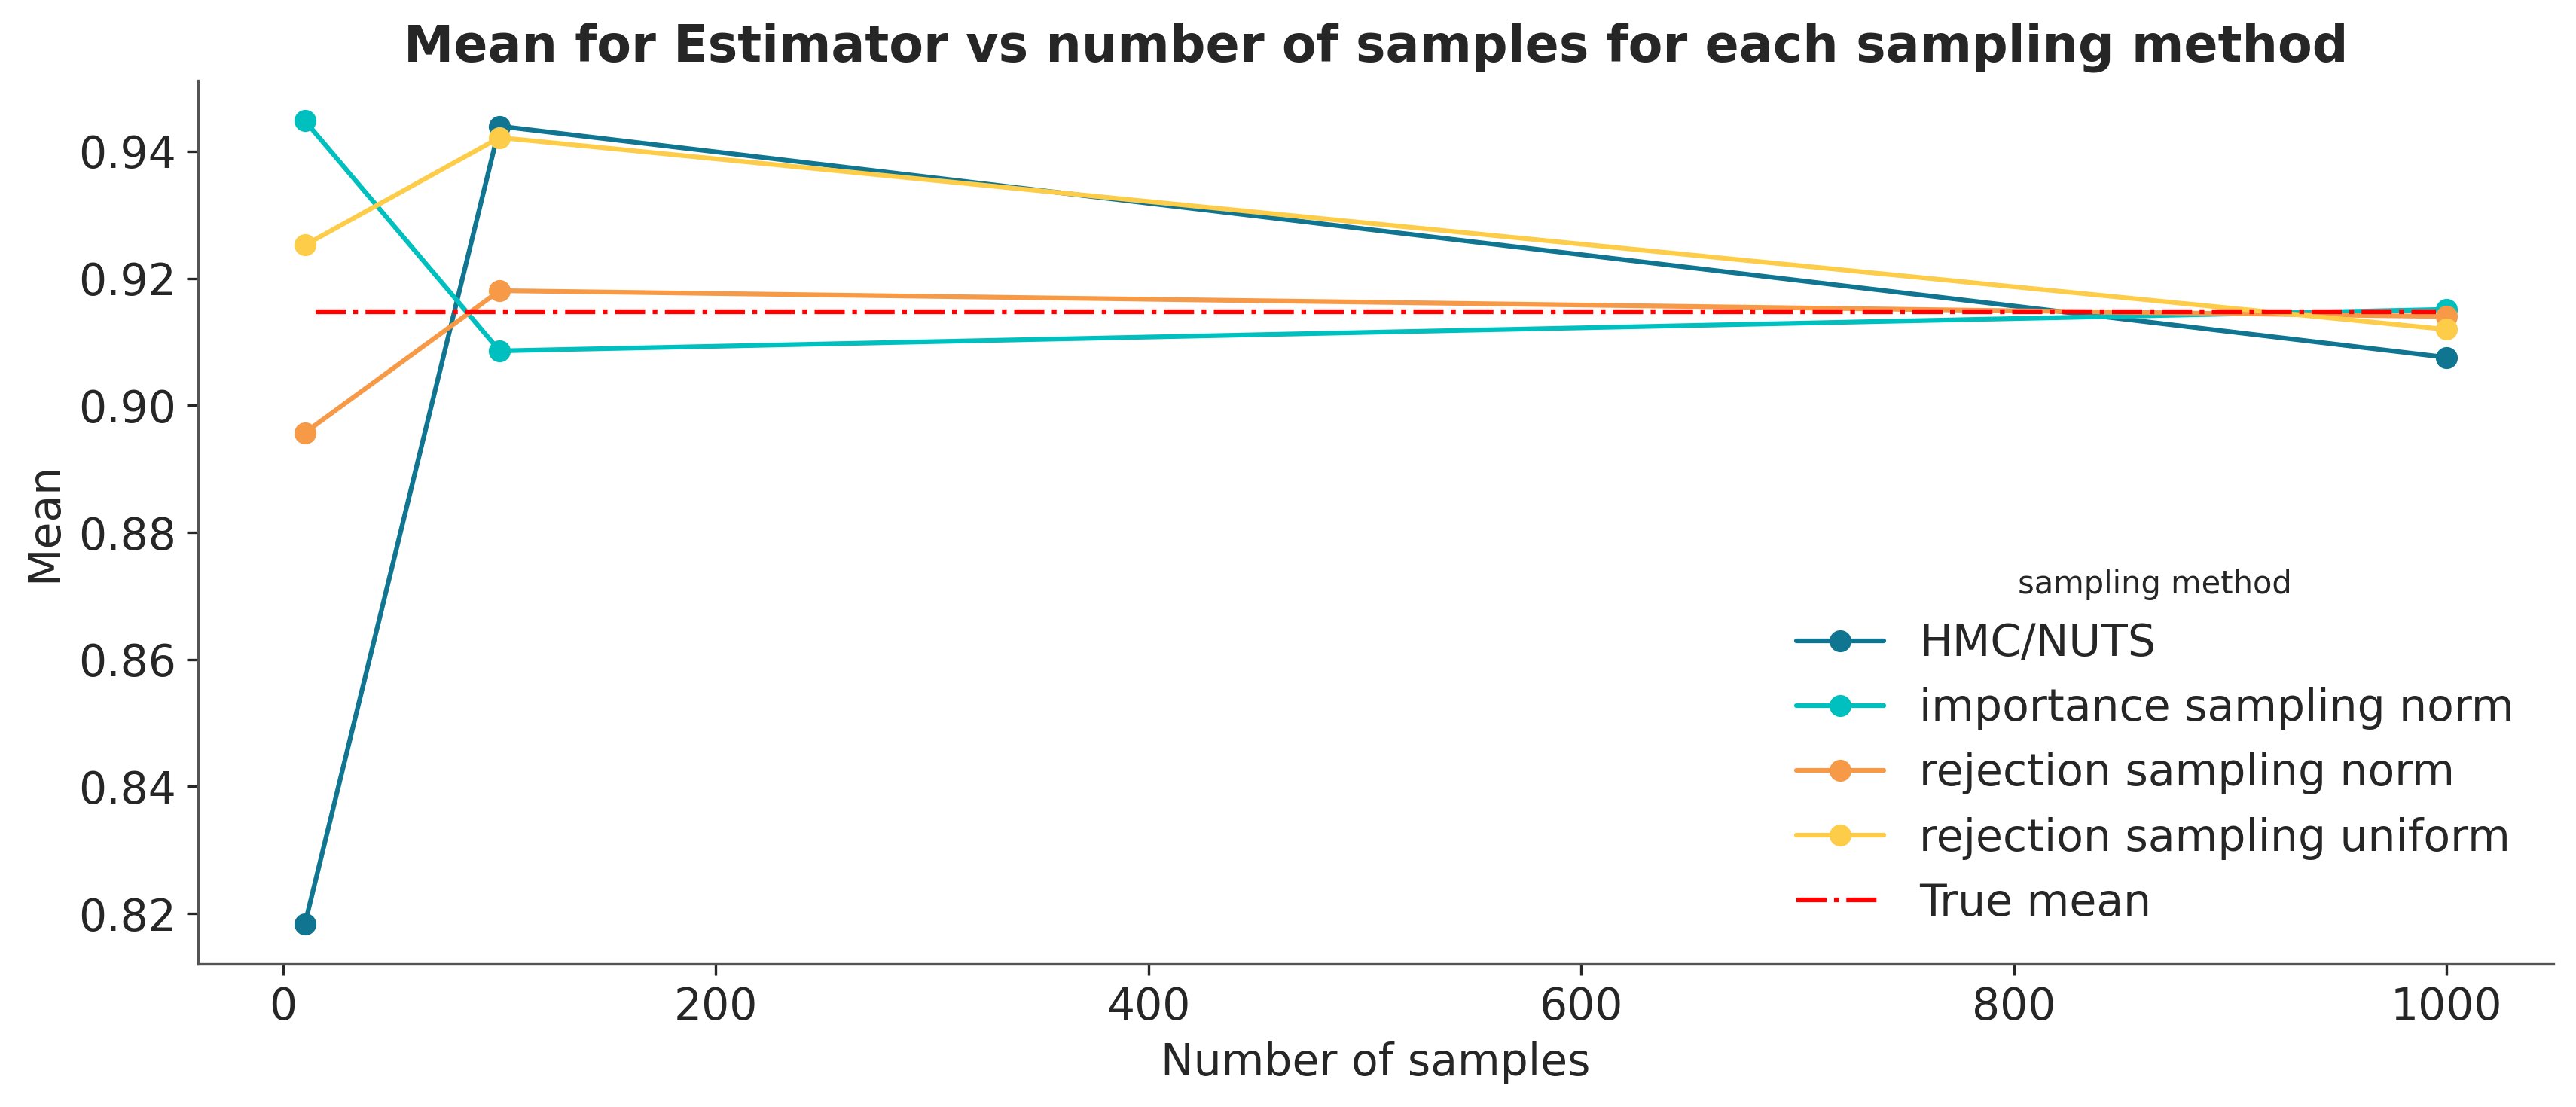

In [34]:
save_fig = True
mean_unstacked = grouped["mean"].unstack("sampling method")
# 0.9147834775810
ax = mean_unstacked.plot(kind="line", marker="o")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Mean")
ax.set_title("Mean for Estimator vs number of samples for each sampling method")
plt.axhline(
    y=0.9147834775810,
    color="r",
    linestyle="-.",
    xmin=0.05,
    xmax=0.95,
    label="True mean",
)
plt.legend(title="sampling method")
plt.tight_layout()
if save_fig:
    plt.savefig("./figures/mean_estimator.png", dpi=600)
plt.show()

/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_9807/1497152730.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


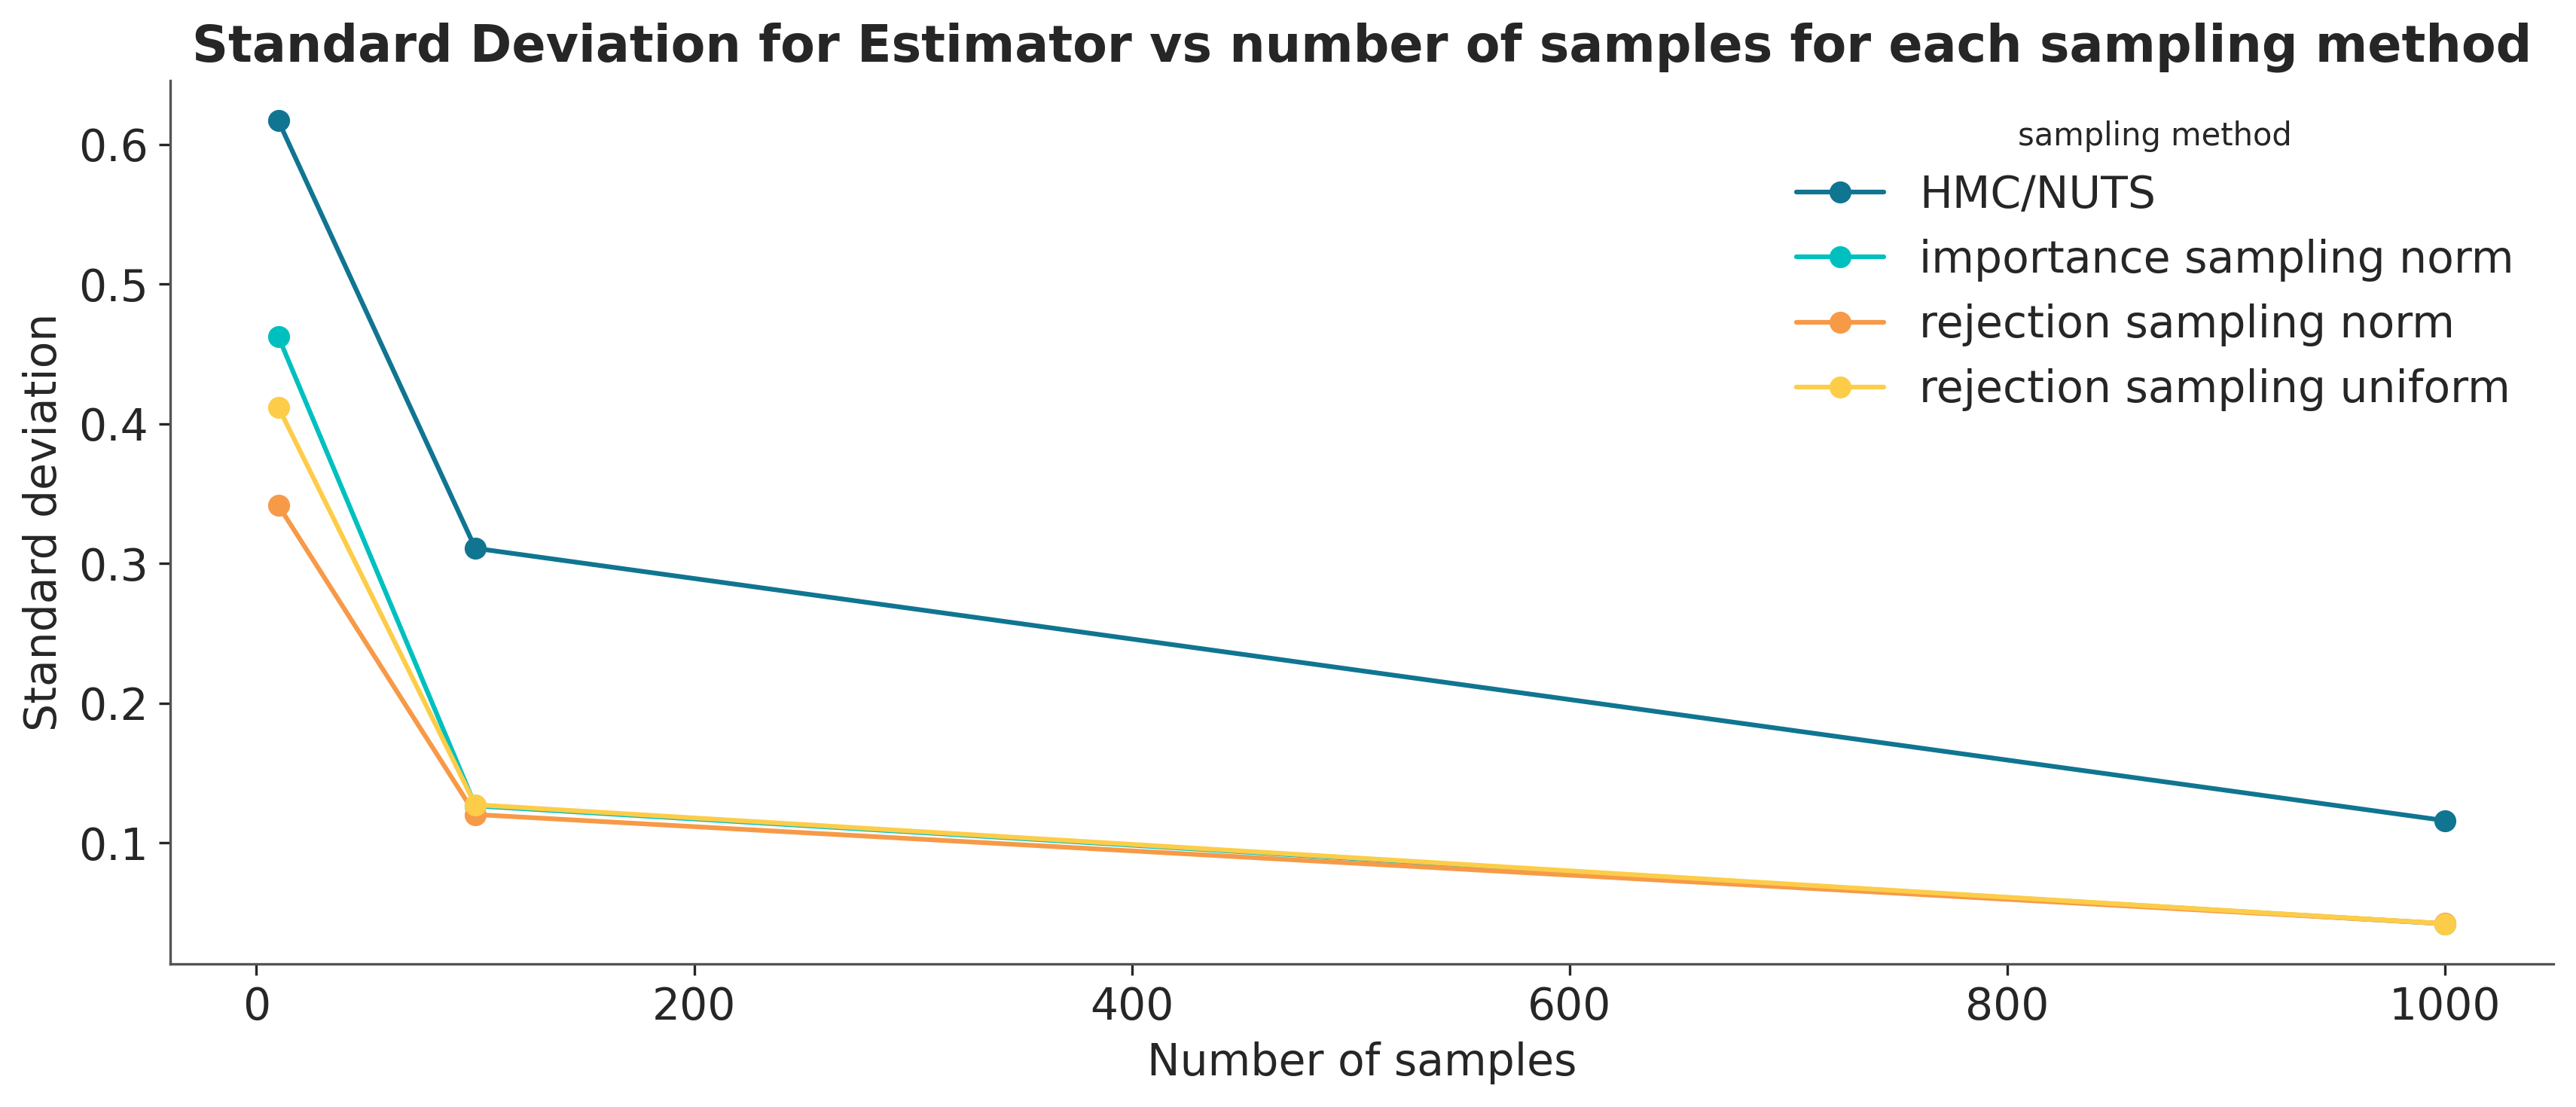

In [35]:
std_unstacked = grouped["std"].unstack("sampling method")

ax = std_unstacked.plot(kind="line", marker="o")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Standard deviation")
ax.set_title(
    "Standard Deviation for Estimator vs number of samples for each sampling method"
)
plt.legend(title="sampling method")
plt.tight_layout()
if save_fig:
    plt.savefig("./figures/std_estimator.png", dpi=600)
plt.show()

In [36]:
# Python package versions used
%load_ext watermark
%watermark --a "Carsten Jørgensen"
%watermark --e "carstenj@gmail.com"
%watermark -m -v -i -iv


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Carsten Jørgensen

Email: carstenj@gmail.com

Python implementation: CPython
Python version       : 3.12.6
IPython version      : 8.28.0

Compiler    : Clang 17.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 11
Architecture: 64bit

arviz     : 0.20.0
matplotlib: 3.9.2
pandas    : 2.2.3
torch     : 2.5.0
pyro      : 1.9.1

